In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
df = pd.read_excel("online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [13]:
df.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [14]:
df = df[(df["Quantity"]>0)&(df["Price"]>0)]
df.describe()

,Quantity,Price,Customer ID
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


In [15]:
df["TotalAmount"]=df["Quantity"]*df["Price"]

In [16]:
df["InvoiceDate"].dtype

dtype('<M8[ns]')

In [17]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [18]:
max_date=df["InvoiceDate"].max()+pd.Timedelta(days=1)

In [19]:
df_grouped = df.groupby("Customer ID")

In [20]:
rfm_table= df_grouped.agg({"InvoiceDate":lambda x: (max_date-x.max()).days,
                          "Invoice": lambda x: x.nunique(),
                          "TotalAmount": lambda x: x.sum()})
rfm_table.head()

,InvoiceDate,Invoice,TotalAmount
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


In [21]:
rfm_table=rfm_table.rename(columns={"InvoiceDate":"Recency","Invoice":"Frequency","TotalAmount":"MonetaryValue"})
rfm_table.describe()

,Recency,Frequency,MonetaryValue
count,4312.000000,4312.000000,4312.000000
mean,91.171846,4.455705,2048.238236
std,96.860633,8.170213,8914.481280
min,1.000000,1.000000,2.950000
25%,18.000000,1.000000,307.987500
50%,53.000000,2.000000,706.020000
75%,136.000000,5.000000,1723.142500
max,374.000000,205.000000,349164.350000


In [22]:
quantiles= (0.25, 0.5, 0.75)
quant = rfm_table.quantile(quantiles)
def R_calculator(x,recency,quantiles):
    if x <= quantiles[recency][0.25]:
        return 4
    elif x <= quantiles[recency][0.5]:
        return 3
    elif x <= quantiles[recency][0.75]:
        return 2
    else:
        return 1
    
def FM_calculator(x,FM,quantiles):
    if x <= quantiles[FM][0.25]:
        return 1
    elif x <= quantiles[FM][0.5]:
        return 2
    elif x<= quantiles[FM][0.75]:
        return 3
    else:
        return 4

    
rfm_table["R"]=rfm_table["Recency"].apply(R_calculator,args=("Recency",quant))
rfm_table["F"]=rfm_table["Frequency"].apply(FM_calculator,args=("Frequency",quant))
rfm_table["M"]=rfm_table["MonetaryValue"].apply(FM_calculator,args=("MonetaryValue",quant))

rfm_table.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,165,11,372.86,1,4,2
12347.0,3,2,1323.32,4,2,3
12348.0,74,1,222.16,2,1,1
12349.0,43,3,2671.14,3,3,4
12351.0,11,1,300.93,4,1,1


In [23]:
rfm_table["rfm_combined"]= rfm_table["R"].map(str) + rfm_table["F"].map(str) + rfm_table["M"].map(str) 
rfm_table["rfm_total"]=rfm_table["R"]+rfm_table["F"]+rfm_table["M"]
rfm_table.head()

,Recency,Frequency,MonetaryValue,R,F,M,rfm_combined,rfm_total
Customer ID,,,,,,,,
12346.0,165,11,372.86,1,4,2,142,7
12347.0,3,2,1323.32,4,2,3,423,9
12348.0,74,1,222.16,2,1,1,211,4
12349.0,43,3,2671.14,3,3,4,334,10
12351.0,11,1,300.93,4,1,1,411,6


<AxesSubplot:xlabel='rfm_total', ylabel='Count'>

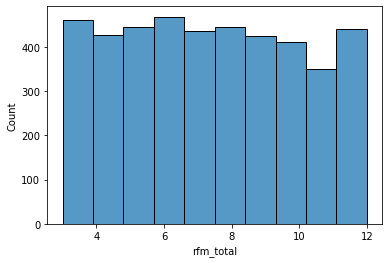

In [55]:
sns.histplot(rfm_table["rfm_total"],bins=rfm_table["rfm_total"].nunique())

<AxesSubplot:xlabel='Recency', ylabel='Count'>

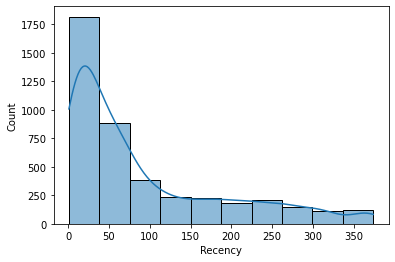

In [24]:
sns.histplot(rfm_table["Recency"],bins=rfm_table["rfm_total"].nunique(),kde=True)


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

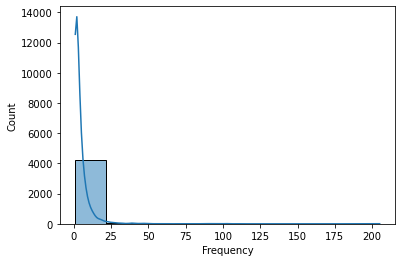

In [25]:
sns.histplot(rfm_table["Frequency"],bins=rfm_table["rfm_total"].nunique(),kde=True)


<AxesSubplot:xlabel='MonetaryValue', ylabel='Count'>

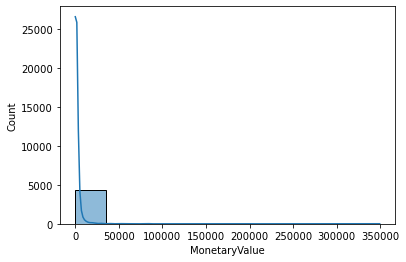

In [26]:
sns.histplot(rfm_table["MonetaryValue"],bins=rfm_table["rfm_total"].nunique(),kde=True)

In [27]:
rfm_table_logged = np.log(rfm_table.loc[:,"Recency":"MonetaryValue"])

<AxesSubplot:xlabel='Recency', ylabel='Count'>

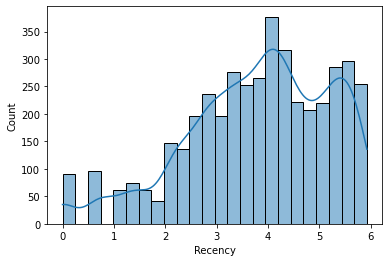

In [28]:
sns.histplot(data=rfm_table_logged["Recency"],kde=True)

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

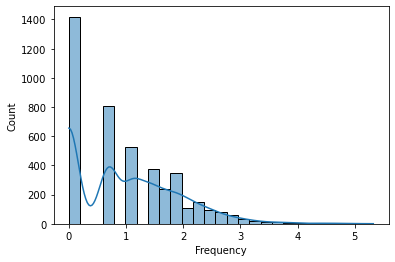

In [29]:
sns.histplot(data=rfm_table_logged["Frequency"],kde=True)

<AxesSubplot:xlabel='MonetaryValue', ylabel='Count'>

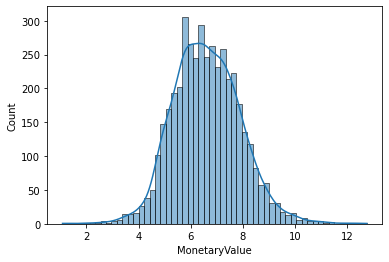

In [30]:
sns.histplot(data=rfm_table_logged["MonetaryValue"],kde=True)

In [31]:
scaler = StandardScaler()
scaler.fit(rfm_table_logged)

StandardScaler()

In [32]:
##min max scaler ile dene // robust scaler ile dene

In [33]:
scaled_rfm_array = scaler.transform(rfm_table_logged)
rfm_table_scaled=pd.DataFrame(scaled_rfm_array, columns=["Recency","Frequency","MonetaryValue"])
rfm_table_scaled["Customer ID"] = rfm_table.index
rfm_table_scaled

,Recency,Frequency,MonetaryValue,Customer ID
0,0.942545,1.562935,-0.538792,12346.0
1,-1.940934,-0.315366,0.448030,12347.0
2,0.365552,-1.079079,-0.942189,12348.0
3,-0.025067,0.131378,0.995207,12349.0
4,-1.006034,-1.079079,-0.705763,12351.0
...,...,...,...,...
4307,-0.651673,0.895091,-0.115746,18283.0
4308,0.294048,-1.079079,-0.372333,18284.0
4309,1.363061,-1.079079,-0.433167,18285.0
4310,0.663758,-0.315366,0.432037,18286.0


###### elbow method

In [34]:
sse= {}
for i in range(1,21):
    kmean = KMeans(n_clusters=i,random_state=1)
    kmean.fit(scaled_rfm_array)
    sse[i]=kmean.inertia_

<AxesSubplot:>

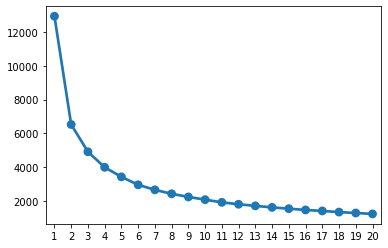

In [35]:
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_rfm_array)

KMeans(n_clusters=4)

In [37]:
###predict ile retrain 

In [48]:
rfm_table["Cluster_Predict"]=kmeans.predict(scaled_rfm_array)

In [49]:
rfm_table

,Recency,Frequency,MonetaryValue,R,F,M,rfm_combined,rfm_total,Cluster,Cluster_Predict
Customer ID,,,,,,,,,,
12346.0,165,11,372.86,1,4,2,142,7,0,0
12347.0,3,2,1323.32,4,2,3,423,9,3,3
12348.0,74,1,222.16,2,1,1,211,4,1,1
12349.0,43,3,2671.14,3,3,4,334,10,0,0
12351.0,11,1,300.93,4,1,1,411,6,3,3
...,...,...,...,...,...,...,...,...,...,...
18283.0,18,6,641.77,4,4,2,442,10,0,0
18284.0,67,1,461.68,2,1,2,212,5,1,1
18285.0,296,1,427.00,1,1,2,112,4,1,1


In [38]:
### rfm_combined ve rfm_total ile clustering

In [50]:
kmeans_total = KMeans(n_clusters=4)
kmeans_total.fit

In [39]:
rfm_table["Cluster"]=kmeans.labels_
rfm_table_scaled["Cluster"]=kmeans.labels_
rfm_table.head()

,Recency,Frequency,MonetaryValue,R,F,M,rfm_combined,rfm_total,Cluster
Customer ID,,,,,,,,,
12346.0,165,11,372.86,1,4,2,142,7,0
12347.0,3,2,1323.32,4,2,3,423,9,3
12348.0,74,1,222.16,2,1,1,211,4,1
12349.0,43,3,2671.14,3,3,4,334,10,0
12351.0,11,1,300.93,4,1,1,411,6,3


In [40]:
rfm_table.groupby("Cluster").agg({"Recency":"mean","Frequency":"mean","MonetaryValue":{"mean","count"}})

Recency  Frequency MonetaryValue      
               mean       mean          mean count
Cluster                                           
0         81.027280   4.214341   1734.767610  1283
1        183.195225   1.249298    306.742579  1424
2         12.867454  13.598425   7481.436638   762
3         21.945433   1.975089    555.919669   843

In [41]:
rfm_table_melted = pd.melt(rfm_table_scaled.reset_index(),id_vars=["Cluster"],value_vars=["Recency","Frequency","MonetaryValue"],var_name="Metrics",value_name="Value")
rfm_table_melted.head()

,Cluster,Metrics,Value
0,0,Recency,0.942545
1,3,Recency,-1.940934
2,1,Recency,0.365552
3,0,Recency,-0.025067
4,3,Recency,-1.006034


<AxesSubplot:xlabel='Metrics', ylabel='Value'>

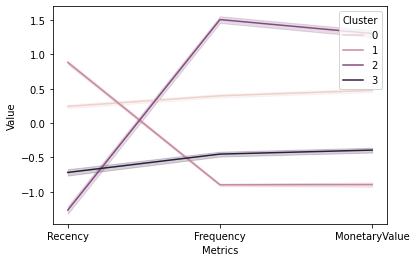

In [42]:
sns.lineplot(data=rfm_table_melted,x="Metrics",y="Value",hue="Cluster")

In [43]:
rfm_cluster_relative=rfm_table.groupby("Cluster").mean().loc[:,"Recency":"MonetaryValue"]
rfm_cluster_relative

,Recency,Frequency,MonetaryValue
Cluster,,,
0,81.027280,4.214341,1734.767610
1,183.195225,1.249298,306.742579
2,12.867454,13.598425,7481.436638
3,21.945433,1.975089,555.919669


In [44]:
rfm_cluster_relative["Recency"]=(rfm_cluster_relative["Recency"]/rfm_table.mean().Recency)-1
rfm_cluster_relative["Frequency"]=(rfm_cluster_relative["Frequency"]/rfm_table.mean().Frequency)-1
rfm_cluster_relative["MonetaryValue"]=(rfm_cluster_relative["MonetaryValue"]/rfm_table.mean().MonetaryValue)-1


In [45]:
rfm_cluster_relative

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.111269,-0.054170,-0.153044
1,1.009340,-0.719618,-0.850241
2,-0.858866,2.051913,2.652620
3,-0.759296,-0.556728,-0.728586


<AxesSubplot:ylabel='Cluster'>

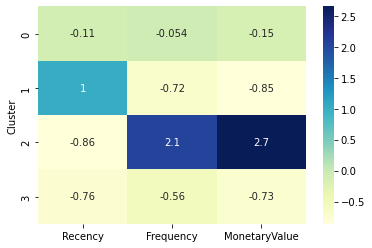

In [46]:
sns.heatmap(data=rfm_cluster_relative,annot=True,cmap="YlGnBu")